# Black Scholes 模型

Black-Scholes模型是Fischer Black和Myron Scholes在1973的论文"The Pricing of Options and Corporate Liabilities"中提出的。自论文出版以来，这个模型成为了投资者广泛使用的工具。时至今日，它依然是确定期权公允价格的最好的方式之一。

## 假设

* 欧式期权之内在到期日行权
* 在期权的生命周期内，没有股息分派
* 市场走势不能被预测
* 无风险利率和波动率为常数
* 标的物的走势服从对数正态分布

## 无股息 Black-Scholes 公式

在Black-Schole公式中, 定义如下参数.

* $S$, 在时间$t$时的资产价格
* $T$, 期权到期时间. 期权的剩余时间定义为$T−t$
* $K$, 期权行权价
* $r$, 无风险收益率，假设在其在时间段$t$和$T$中为常量
* $\sigma$, 标的资产的波动率, 即标的资产回报的标准差

### $N(d)$是服从正态分布的随机变量$Z$的积累分布函数

$$N(d) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^d e^{-\frac{1}{2}x^2} dx$$

$C(S,t)$是在时间$t$的看涨期权的价值；$P(S,t)$是在时间$t$的看跌期权的价值。

Black-Scholes看涨期权公式是:

$$C(S,t) = SN(d_1) - Ke^{-r(T - t)} N(d_2)$$

看跌期权公式是：

$$P(S,t) = Ke^{-r(T - t)}N(-d_2) - SN(-d_1)$$

其中

$$d_1 = \frac{\ln \left(\frac{S}{K} \right) + \left(r + \frac{\sigma^2}{2} \right)(T - t)}{\sigma \sqrt{T - t}}$$

$$d_2 = d_1 - \sigma \sqrt{T - t} = \frac{\ln \left(\frac{S}{K} \right) + \left(r - \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}$$

## 无股息Black-Scholes公式的Python实现

In [1]:
import numpy as np
import scipy.stats as si
import sympy as sy
import sympy.stats as systats
sy.init_printing()

In [2]:
def euro_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    N = systats.Normal("x", 0.0, 1.0)
    
    d1 = (sy.ln(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sy.sqrt(T))
    d2 = (sy.ln(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sy.sqrt(T))
    
    call = (S * systats.cdf(N)(d1) - K * sy.exp(-r * T) * systats.cdf(N)(d2))
    
    return call

In [3]:
def euro_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    N = systats.Normal("x", 0.0, 1.0)
    
    d1 = (sy.ln(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sy.sqrt(T))
    d2 = (sy.ln(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sy.sqrt(T))
    
    put = (K * sy.exp(-r * T) * systats.cdf(N)(-d2) - S * systats.cdf(N)(-d1))
    
    return put

测试一下

In [4]:
euro_call(50, 100, 1, 0.05, 0.25)

In [5]:
euro_call(50, 100, 1, 0.05, 0.25).evalf()

### 符号计算扩展

In [6]:
S, K, T, t, r, sigma = sy.symbols("S K T t r sigma")
call_price = euro_call(S, K, T-t, r, sigma)

#### Delta
$$\Delta = \frac{\partial V}{\partial S}$$

In [7]:
delta = sy.diff(call_price, S)

#### Gamma
$$\Gamma = \frac{\partial^2 V}{\partial S^2}$$

In [8]:
gamma = sy.diff(call_price, S, 2)

#### Theta
$$\Theta = \frac{\partial V}{\partial t}$$

In [9]:
theta = sy.diff(call_price, t)

## 图像

In [10]:
import matplotlib
import matplotlib.pyplot as plt

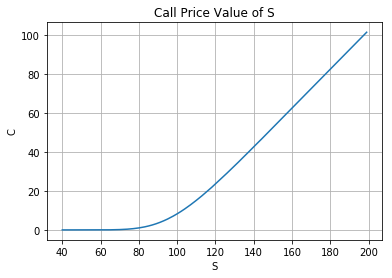

In [11]:
# Data for plotting
s = np.arange(40.0, 200.0, 1.0)
c = []
for s_i in s:
    c.append(call_price.evalf(subs={
        S: s_i,
        K: 100, 
        T: 1,
        t: 0.5,
        r: 0.05,
        sigma: 0.25},n=2))

fig, ax = plt.subplots()
ax.plot(s, c)

ax.set(xlabel='S', ylabel='C',
       title='Call Price Value of S')
ax.grid()

plt.show()

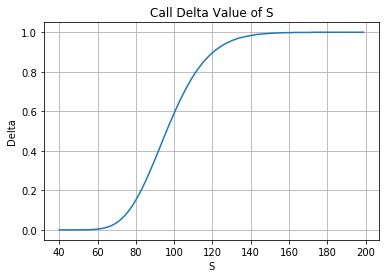

In [12]:
## Delta Plot
s = np.arange(40.0, 200.0, 1.0)
c = []
for s_i in s:
    c.append(delta.evalf(subs={
        S: s_i,
        K: 100, 
        T: 1,
        t: 0.5,
        r: 0.05,
        sigma: 0.25},n=2))

fig, ax = plt.subplots()
ax.plot(s, c)

ax.set(xlabel='S', ylabel='Delta',
       title='Call Delta Value of S')
ax.grid()

plt.show()

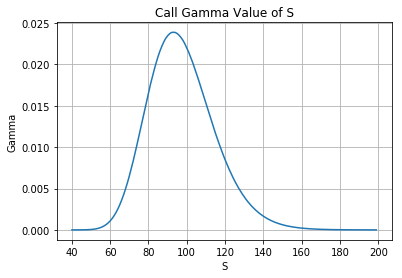

In [13]:
## Gamma Plot
s = np.arange(40.0, 200.0, 1.0)
c = []
for s_i in s:
    c.append(gamma.evalf(subs={
        S: s_i,
        K: 100, 
        T: 1,
        t: 0.5,
        r: 0.05,
        sigma: 0.25},n=2))

fig, ax = plt.subplots()
ax.plot(s, c)

ax.set(xlabel='S', ylabel='Gamma',
       title='Call Gamma Value of S')
ax.grid()

plt.show()

## 内容主要引用自
[Black-Scholes Formula and Python Implementation](https://aaronschlegel.me/black-scholes-formula-python.html)